<a href="https://colab.research.google.com/github/Madhumita-Joshi/Bhoomi---Soil-classifier-and-crop-predictor/blob/main/Bhoomi%20Backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_name = ['Black Soil','Yellow Soil','Peat Soil','Cinder Soil','Laterite Soil']
path = []
label = []

st = '/content/drive/MyDrive/Soil types/train/'

for s in file_name:
  for i in range(2,12):
    string = st + s +'/'+str(i)+'.jpg'
    path.append(string)
    label.append(s)
    string = ''

print(label, end = "\n")
print(path)

['Black Soil', 'Black Soil', 'Black Soil', 'Black Soil', 'Black Soil', 'Black Soil', 'Black Soil', 'Black Soil', 'Black Soil', 'Black Soil', 'Yellow Soil', 'Yellow Soil', 'Yellow Soil', 'Yellow Soil', 'Yellow Soil', 'Yellow Soil', 'Yellow Soil', 'Yellow Soil', 'Yellow Soil', 'Yellow Soil', 'Peat Soil', 'Peat Soil', 'Peat Soil', 'Peat Soil', 'Peat Soil', 'Peat Soil', 'Peat Soil', 'Peat Soil', 'Peat Soil', 'Peat Soil', 'Cinder Soil', 'Cinder Soil', 'Cinder Soil', 'Cinder Soil', 'Cinder Soil', 'Cinder Soil', 'Cinder Soil', 'Cinder Soil', 'Cinder Soil', 'Cinder Soil', 'Laterite Soil', 'Laterite Soil', 'Laterite Soil', 'Laterite Soil', 'Laterite Soil', 'Laterite Soil', 'Laterite Soil', 'Laterite Soil', 'Laterite Soil', 'Laterite Soil']
['/content/drive/MyDrive/Soil types/train/Black Soil/2.jpg', '/content/drive/MyDrive/Soil types/train/Black Soil/3.jpg', '/content/drive/MyDrive/Soil types/train/Black Soil/4.jpg', '/content/drive/MyDrive/Soil types/train/Black Soil/5.jpg', '/content/drive/My

In [ ]:
soil_images = []

for i in range(len(path)):
  image = cv2.imread(path[i])
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  resized_image = cv2.resize(gray_image,(150,200))
  numpydata = np.asarray(resized_image)
  soil_images.append(numpydata)

In [ ]:
len(soil_images)

50

**Creating Laws Masks**

In [ ]:
L5 = np.array([1,4,6,4,1])
L5=L5.reshape(1,5)
E5 = np.array([1, -2, 0, 2, 1])
E5=E5.reshape(1,5)
S5 = np.array([-1, 0, 2, 0,-1])
S5=S5.reshape(1,5)
W5 = np.array([-1, 2, 0, -2, 1])
W5=W5.reshape(1,5)
R5 = np.array([1, -4, 6, -4, 1])
R5=R5.reshape(1,5)
label = ["L5","E5","S5","W5","R5"]
arr=np.stack((L5,E5,S5,W5,R5),axis=0)

In [ ]:
kernels = []
labels = []
for i in range(0,5):
  for j in range(0,5):
   mask=np.multiply(arr[i],np.transpose(arr[j]))
   #print(mask)
   labels.append(label[i]+label[j])
   kernels.append(mask)

In [ ]:
kernels=np.array(kernels)

In [ ]:
def convolve2D(image, kernel, padding,strides):

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        #print(imagePadded)

    else:
        imagePadded = image

    # Iterate through image
    for y in range(imagePadded.shape[1]):
        # Exit Convolution
        if y > imagePadded.shape[1] - yKernShape:
            break
        
        
        for x in range(image.shape[0]):
            # Go to next row once kernel is out of bounds
            if x > imagePadded.shape[0] - xKernShape:
              break
            else:
              output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                

    return output

In [ ]:
Texture_images = []
for image in soil_images:
  Texture_individual = []
  for kernel in kernels:
      Texture_individual.append(convolve2D(image,kernel, padding=2, strides=1))
  
  Texture_images.append(Texture_individual)
  

In [ ]:
len(Texture_images[0])

25

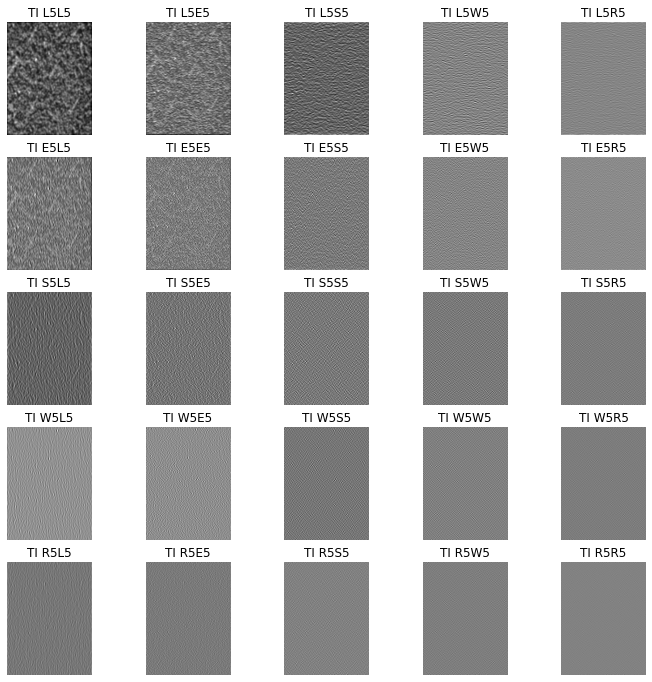

In [ ]:
plt.figure(figsize= (12,12))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.title("TI "+labels[i])
    plt.imshow(Texture_images[0][i],cmap = "gray")

In [ ]:
Normalized=[]

for i in range(len(Texture_images)):
  temp = []
  for j in range(0,25):
    norm = np.zeros((220,220))
    final = cv2.normalize(Texture_images[i][j],norm, 1, 36, cv2.NORM_MINMAX)
    temp.append(final)
  Normalized.append(temp)

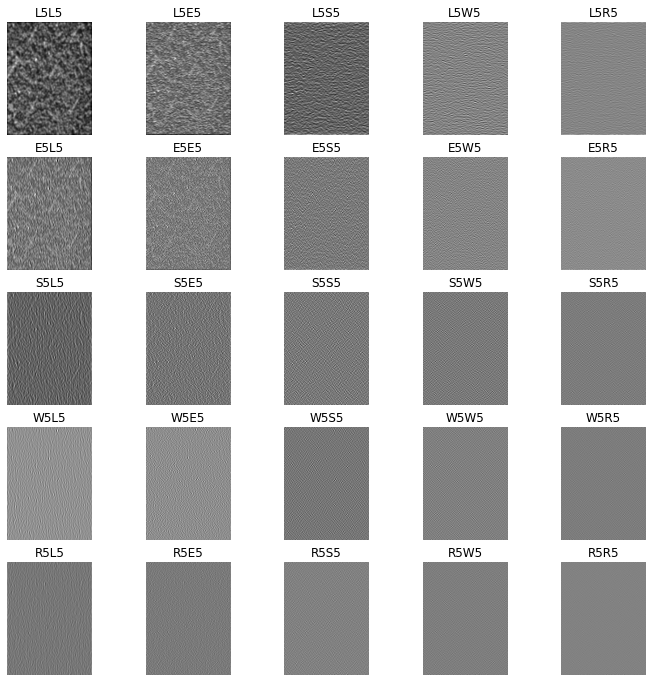

In [ ]:

plt.figure(figsize= (12,12))
for i in range(0,25):
  plt.subplot(5,5,i+1)
  plt.axis('off')
  plt.title(labels[i])
  plt.imshow(Normalized[0][i],cmap = "gray")



In [ ]:
def meanfilter(image, kernel,padding,strides):

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        #print(imagePadded)

    else:
        imagePadded = image

    # Iterate through image
    for y in range(imagePadded.shape[1]):
        # Exit Convolution
        if y > imagePadded.shape[1] - yKernShape:
            break
        
        for x in range(image.shape[0]):
            # Go to next row once kernel is out of bounds
            if x > imagePadded.shape[0] - xKernShape:
              break
            else:

              output[x,y] = ((imagePadded[x: x + xKernShape, y: y + yKernShape]).sum())
              

         
    return output

In [ ]:
Texture_energy= []
window = np.zeros((5,5))

for i in range(len(Texture_images)):
  temp = []
  for j in range(0,25):

    temp.append(meanfilter(Normalized[i][j],window, padding=2, strides=1))
  
  
  Texture_energy.append(temp)
   


In [ ]:
Texture_energy[0][0]

array([[ 82.27302895, 107.63709419, 129.19078842, ...,  86.07608348,
         60.36778346,  40.93966896],
       [123.60762834, 164.59047657, 201.39772909, ..., 139.25355829,
         95.38809372,  61.41308172],
       [163.17347673, 222.85642891, 278.6954262 , ..., 199.17439629,
        136.35554934,  87.64892851],
       ...,
       [110.56153047, 168.83675836, 233.18647049, ..., 206.42991364,
        156.05389413, 110.79381897],
       [ 78.47789061, 117.53106509, 160.82700304, ..., 154.34251559,
        115.21237806,  81.64457061],
       [ 51.1393731 ,  75.48192867, 102.48880537, ..., 105.44418679,
         78.73116904,  56.72269311]])

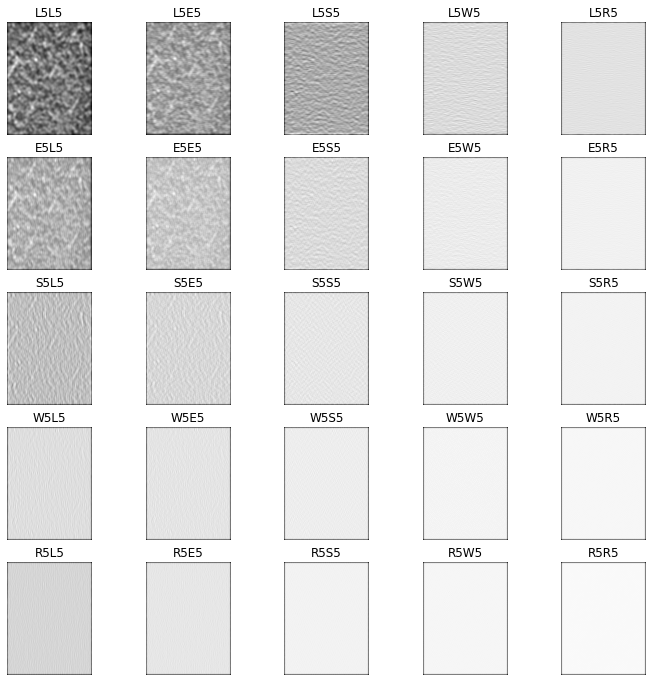

In [ ]:
plt.figure(figsize= (12,12))
for i in range(0,25):
  plt.subplot(5,5,i+1)
  plt.axis('off')
  plt.title(labels[i])
  plt.imshow(Texture_energy[0][i],cmap = "gray")



In [ ]:
Rotational_invariance = []


flag=0
for i in range(0,50):
  done = []
  flag=flag+1
 
  flag2=0
  temp=[]
  for j in range(0,25):
    key1 = labels[j]
    for k in range(0,25):
      key2 = labels[k]
      count=0
      if key1[:2] == key2[-2:] and key1[-2:] == key2[:2] and key1 not in done:
            
            done.append(key2)   
            x = (Texture_energy[i][j]+Texture_energy[i][k])/2
            temp.append(x)
            #print("Length",len(temp))

          
  
  Rotational_invariance.append(temp)


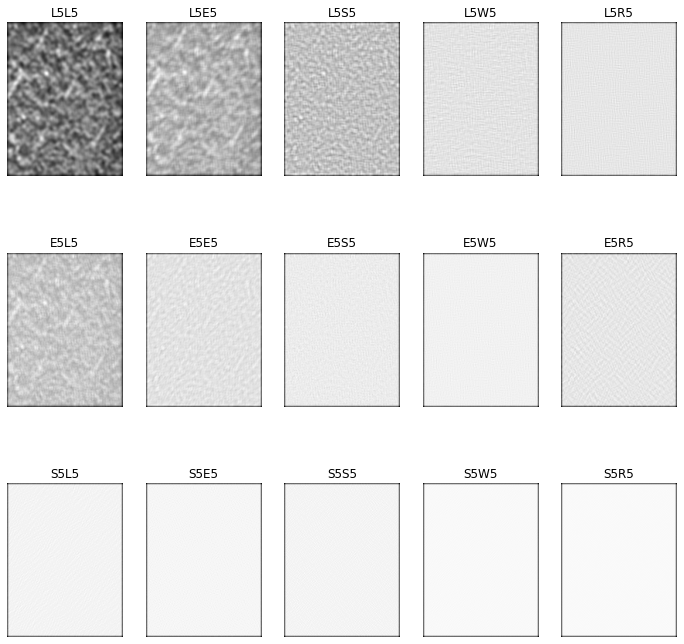

In [ ]:
plt.figure(figsize= (12,12))
for i in range(0,15):
  plt.subplot(3,5,i+1)
  plt.axis('off')
  plt.title(labels[i])
  plt.imshow(Rotational_invariance[0][i],cmap = "gray")


In [ ]:
len(Rotational_invariance)

50

In [ ]:
# for i in range(0,50):
#   temp=[]
#   for j in range (0,15):
#       v = chemcepterize_mol(mol, embed=10, res=0.2)
    




In [ ]:
import cv2 as cv
from scipy.stats import kurtosis,skew
from skimage.filters.rank import entropy

FV = []
SD = []
window = np.zeros((220,220))
for i in range(0,50):
  temp1=[]
  temp2 = []
  for j in range (0,15):
            # temp.append(mean(Rotational_invariance[i][j],window,padding=0,strides=1))
            means, dev = cv.meanStdDev(Normalized[i][j])
            # entropy = entropy(Normalized[i][j], disk(5))
            # skewness = skew(Normalized[i][j])
            # kurtosis = kurtosis(Normalized[i][j])
            temp1.append(means)
            temp2.append(dev)

            # Normalized[i][j].mean()
            

  FV.append(temp1)
  SD.append(temp2)


In [ ]:
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# soil_images[1].shape

In [ ]:
from PIL import Image

im = Image.open('/content/drive/MyDrive/Soil types/train/Black Soil/10.jpg') # Can be many different formats.
pix = im.load()
s = im.size  # Get the width and hight of the image for iterating over
print(s[0])
print(pix[1,2])

240
(84, 83, 88)


In [ ]:
from statistics import mean
im = Image.open('/content/drive/MyDrive/Soil types/train/Black Soil/10.jpg') # Can be many different formats.
pix = im.load()
s = im.size

r =[]
g = []
b = []
for w in range(s[0]):
    for h in range(s[1]):
      rgb = pix[w,h]
      r.append(rgb[0])
      g.append(rgb[1])
      b.append(rgb[2])

avg = round(mean(r),2)
print(avg)

93.13


In [ ]:
from statistics import mean
from PIL import Image

values = []
for i in range(len(path)):
  im = Image.open(path[i])
  pix = im.load()
  s = im.size
  r = []
  g = []
  b = []
  for w in range(s[0]):
    for h in range(s[1]):
      rgb = pix[w,h]
      r.append(rgb[0])
      g.append(rgb[1])
      b.append(rgb[2])

  avg_r = round(mean(r),2)
  avg_g = round(mean(g),2)
  avg_b = round(mean(b),2)
  values.append([avg_r,avg_g,avg_b])

print(len(values))

50


In [ ]:
# values[0]

In [ ]:
r_percentage = []
for v in values:
  r_p = (v[0]/(v[0]+v[1]+v[2]))*100
  r_percentage.append(r_p)

#r_percentage

In [ ]:
ph = []
for rp in r_percentage:
  p = round((0.0956*rp+4.2722),2)
  ph.append(p)



In [ ]:
FV = np.array(FV)
SD = np.array(SD)

In [ ]:
FV = FV.reshape(50,15)
SD = SD.reshape(50,15)
FV.shape

(50, 15)

In [ ]:
FV = FV.T
SD= SD.T


In [ ]:
import pandas as pd
dff = pd.DataFrame()

In [ ]:
for i in range(0,15):
  dff['Mean'+str(i)] = FV[i]

for i in range(0,15):
   dff['SD'+str(i)] = SD[i]


In [ ]:
#  dff.head(2)

In [ ]:
dff['ph'] = ph

In [ ]:
#  dff.head(2)

In [ ]:
file_name = ['Black Soil','Yellow Soil','Peat Soil','Cinder Soil','Laterite Soil']
l = []

for s in file_name:
  for i in range(2,12):
    l.append(s)

print(l)

['Black Soil', 'Black Soil', 'Black Soil', 'Black Soil', 'Black Soil', 'Black Soil', 'Black Soil', 'Black Soil', 'Black Soil', 'Black Soil', 'Yellow Soil', 'Yellow Soil', 'Yellow Soil', 'Yellow Soil', 'Yellow Soil', 'Yellow Soil', 'Yellow Soil', 'Yellow Soil', 'Yellow Soil', 'Yellow Soil', 'Peat Soil', 'Peat Soil', 'Peat Soil', 'Peat Soil', 'Peat Soil', 'Peat Soil', 'Peat Soil', 'Peat Soil', 'Peat Soil', 'Peat Soil', 'Cinder Soil', 'Cinder Soil', 'Cinder Soil', 'Cinder Soil', 'Cinder Soil', 'Cinder Soil', 'Cinder Soil', 'Cinder Soil', 'Cinder Soil', 'Cinder Soil', 'Laterite Soil', 'Laterite Soil', 'Laterite Soil', 'Laterite Soil', 'Laterite Soil', 'Laterite Soil', 'Laterite Soil', 'Laterite Soil', 'Laterite Soil', 'Laterite Soil']


In [ ]:
dff['Label'] = l

In [ ]:
dff

,Mean0,Mean1,Mean2,Mean3,Mean4,Mean5,Mean6,Mean7,Mean8,Mean9,...,SD7,SD8,SD9,SD10,SD11,SD12,SD13,SD14,ph,Label
0,12.514235,16.455268,14.728235,18.889258,19.276563,17.197655,17.941426,17.701673,19.103340,20.030448,...,3.693945,3.734882,2.954792,3.123397,3.668657,3.772948,3.793569,3.177453,7.56,Black Soil
1,13.484541,18.231590,16.924939,18.167681,12.953465,18.018386,15.767803,17.614492,17.503854,17.019398,...,3.710630,3.484631,2.740536,4.300404,3.615809,3.779095,3.624265,2.696542,8.33,Black Soil
2,13.583907,14.689230,16.893727,18.299354,16.209283,19.371906,17.968362,16.756930,16.748860,18.507548,...,2.935721,2.675432,1.793336,3.208017,3.023863,3.067180,2.481750,1.544232,7.43,Black Soil
3,17.162392,19.512289,17.250209,21.139950,13.809474,19.838053,17.172978,19.305500,19.586321,17.427306,...,3.717492,3.554477,2.565562,4.048342,4.291254,4.385134,4.139382,3.083041,8.02,Black Soil
4,10.444080,12.329035,14.861704,18.250524,15.988145,14.710626,15.093088,15.336360,20.229230,16.580576,...,2.050471,1.698627,1.442334,1.757025,1.694189,1.799757,1.534470,1.211500,7.79,Black Soil
5,19.004193,22.506472,15.479889,18.796532,13.785604,22.678690,20.218283,19.512035,18.771335,19.737120,...,3.984308,3.650642,2.271154,3.952487,4.263064,3.730526,3.601898,2.531357,7.87,Black Soil
6,16.987886,19.866803,15.703234,17.987980,15.841857,18.623950,19.180750,20.066213,16.392310,16.500007,...,3.136380,2.216578,1.721498,3.626066,3.255766,2.851637,2.335464,1.767425,7.76,Black Soil
7,11.251500,16.365569,17.270314,17.714287,16.364768,14.227279,14.372642,17.725969,18.462870,18.299634,...,3.580244,3.067907,1.998991,3.912759,3.341321,3.229240,3.022014,2.094689,7.81,Black Soil
8,12.414119,17.274590,14.561430,18.716283,15.849501,15.947390,15.427230,15.399278,17.888921,16.794287,...,2.967384,2.739804,2.144138,3.082007,3.181000,3.228951,3.047668,2.332885,7.71,Black Soil
9,18.134453,20.142577,20.719872,17.561490,15.954759,21.067810,17.399809,18.355760,20.735771,16.828411,...,3.966807,3.440899,3.180578,4.024900,3.553833,3.647581,2.806976,2.629036,7.93,Black Soil


In [ ]:
X = dff.iloc[:,:-1]
y = dff['Label']

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# lab_val = label_encoder.fit_transform(y)

In [ ]:
# df_1 = dff.iloc[:,:-1] 
# df_1['label_val'] = lab_val

In [ ]:
# df_1.corr()

In [ ]:
# print(X.shape)
# print(y.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_tr = label_encoder.fit_transform(y_train)
y_te = label_encoder.fit_transform(y_test)

In [ ]:
y_tr

array([3, 3, 1, 4, 4, 3, 1, 3, 3, 2, 4, 4, 4, 3, 2, 2, 3, 1, 4, 2, 1, 4,
       0, 2, 1, 3, 0, 0, 1, 1, 2, 1, 1, 0, 0, 3, 2, 0, 0, 2])

In [ ]:
y_te

array([0, 2, 4, 0, 4, 1, 0, 3, 2, 4])

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average=None)
print(precision)
recall = recall_score(y_test, y_pred, average=None)
print(recall)
f1 = f1_score(y_test, y_pred, average=None)
print(f1)

[1.         0.5        0.         1.         0.66666667]
[1.         1.         0.         1.         0.66666667]
[1.         0.66666667 0.         1.         0.66666667]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
print(ac)

0.5


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average=None)
print(precision)
recall = recall_score(y_test, y_pred, average=None)
print(recall)
f1 = f1_score(y_test, y_pred, average=None)
print(f1)

[1.  0.5 0.  0.5 0.5]
[0.66666667 1.         0.         1.         0.33333333]
[0.8        0.66666667 0.         0.66666667 0.4       ]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 10,random_state=42) 
# Train the model on training data
rf.fit(X_train,y_train)
y_pred= rf.predict(X_test)
y

from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
print(ac)

0.9


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average=None)
print(precision)
recall = recall_score(y_test, y_pred, average=None)
print(recall)
f1 = f1_score(y_test, y_pred, average=None)
print(f1)

[1.         1.         0.66666667 1.         1.        ]
[1.         1.         1.         1.         0.66666667]
[1.  1.  0.8 1.  0.8]


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
print(ac)

0.9


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average=None)
print(precision)
recall = recall_score(y_test, y_pred, average=None)
print(recall)
f1 = f1_score(y_test, y_pred, average=None)
print(f1)

[1.         1.         0.66666667 1.         1.        ]
[1.         1.         1.         1.         0.66666667]
[1.  1.  0.8 1.  0.8]


In [ ]:
img = cv2.imread("bs.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized_img = cv2.resize(gray_img,(220,220))
numpydata1 = np.asarray(resized_img)
numpydata1

array([[ 19,  13,   4, ...,  59,  59,  33],
       [ 40,  17,   3, ...,  22,  41,  40],
       [ 42,  12,   3, ...,  12,  36,  37],
       ...,
       [ 27,  20,  18, ...,  21,  20,  50],
       [180, 180, 179, ..., 177, 174, 180],
       [248, 248, 250, ..., 249, 248, 251]], dtype=uint8)

In [ ]:
Texture_individual1 = []
for kernel in kernels:
      Texture_individual1.append(convolve2D(numpydata1,kernel, padding=2, strides=1))

In [ ]:
len(Texture_individual1)

25

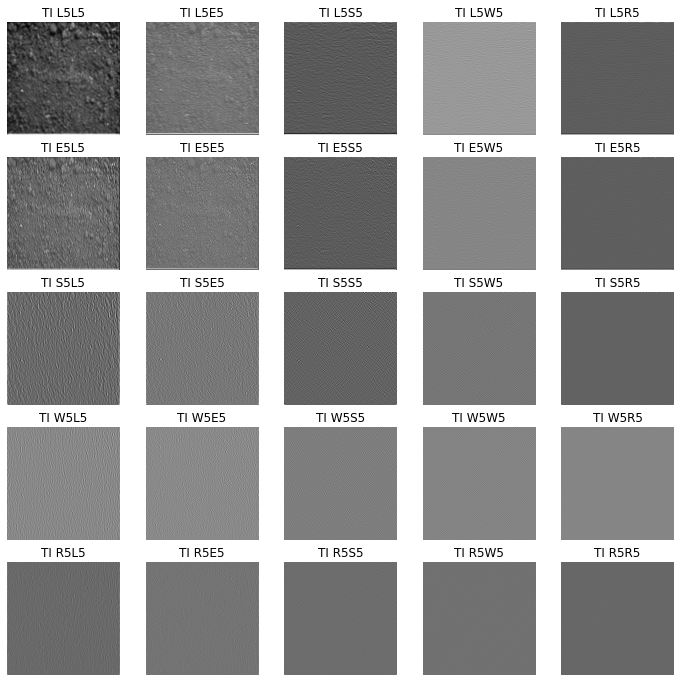

In [ ]:
plt.figure(figsize= (12,12))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.title("TI "+labels[i])
    plt.imshow(Texture_individual1[i],cmap = "gray")

In [ ]:
temp1=[]
Normalized1=[]
for i in range(0,25):
  norm1 = np.zeros((220,220))
  final1 = cv2.normalize(Texture_individual1[i],norm1, 1, 36, cv2.NORM_MINMAX)
  temp1.append(final1)

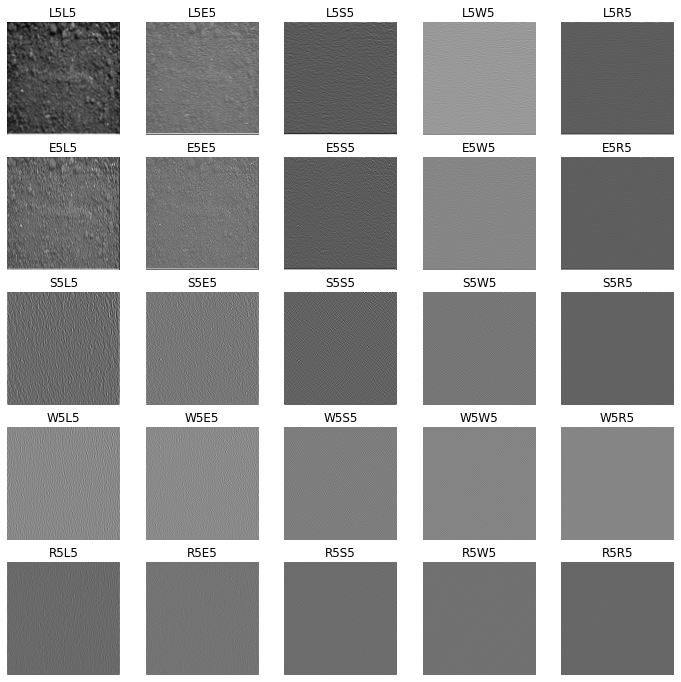

In [ ]:
plt.figure(figsize= (12,12))
for i in range(0,25):
  plt.subplot(5,5,i+1)
  plt.axis('off')
  plt.title(labels[i])
  plt.imshow(temp1[i],cmap = "gray")

In [ ]:
Texture= []
window = np.zeros((5,5))

for j in range(0,25):
  Texture.append(meanfilter(temp1[j],window, padding=2, strides=1))

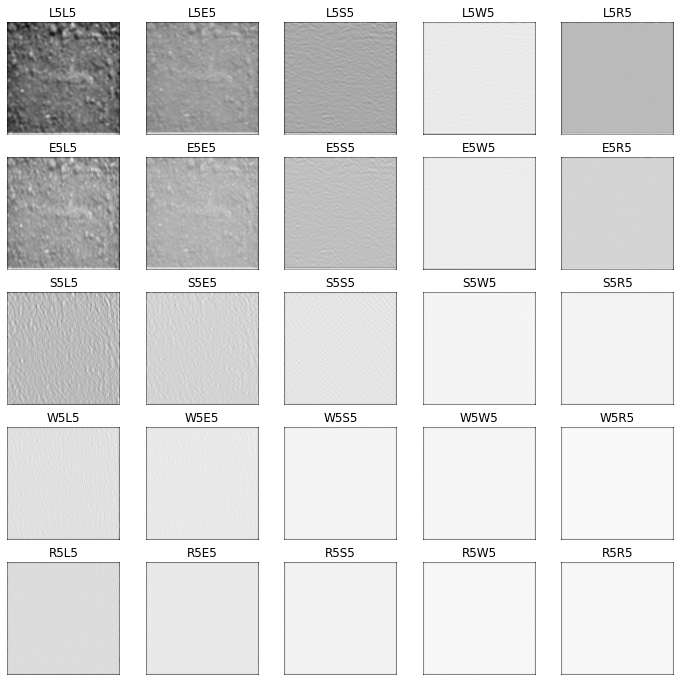

In [ ]:
plt.figure(figsize= (12,12))
for i in range(0,25):
  plt.subplot(5,5,i+1)
  plt.axis('off')
  plt.title(labels[i])
  plt.imshow(Texture[i],cmap = "gray")

In [ ]:
Rotational = []
done = []
for j in range(0,25):
  key1 = labels[j]
  for k in range(0,25):
    key2 = labels[k]
    count=0
    if key1[:2] == key2[-2:] and key1[-2:] == key2[:2] and key1 not in done:
      done.append(key2)   
      x = (Texture[j]+Texture[k])/2
      Rotational.append(x)

In [ ]:
len(Rotational)

15

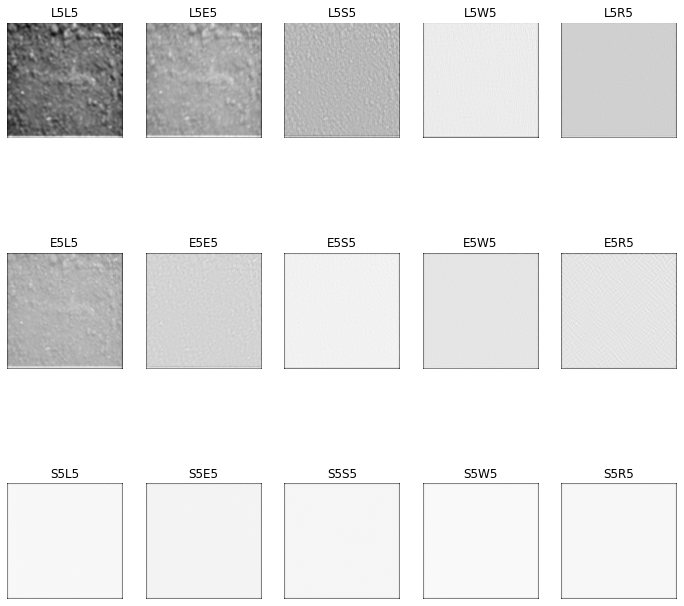

In [ ]:
plt.figure(figsize= (12,12))
for i in range(0,15):
  plt.subplot(3,5,i+1)
  plt.axis('off')
  plt.title(labels[i])
  plt.imshow(Rotational[i],cmap = "gray")


In [ ]:
from PIL import Image

im1 = Image.open('bs.jpg') # Can be many different formats.
pix = im1.load()
s = im1.size  # Get the width and hight of the image for iterating over
r1 =[]
g1 = []
b1 = []
values1 = []
for w in range(s[0]):
    for h in range(s[1]):
      rgb1 = pix[w,h]
      r1.append(rgb1[0])
      g1.append(rgb1[1])
      b1.append(rgb1[2])

avg_r1 = round(mean(r1),2)
avg_g1 = round(mean(g1),2)
avg_b1 = round(mean(b1),2)
values1.append(avg_r1)
values1.append(avg_g1)
values1.append(avg_b1)


In [ ]:
values1

[47.36, 46.29, 46.36]

In [ ]:
r_p1 = (values1[0]/(values1[0]+values1[1]+values1[2]))*100
r_p1

33.82615527462324

In [ ]:
ph1 = round((0.0956*r_p1+4.2722),2)
ph1

7.51

In [ ]:
import cv2 as cv

FV1 = []
SD1 = []
for j in range (0,15):
  means, dev = cv.meanStdDev(temp1[j])
  FV1.append(means)
  SD1.append(dev)

In [ ]:
FV1 = np.array(FV1)
SD1 = np.array(SD1)
FV1 = FV1.reshape(1,15)
SD1 = SD1.reshape(1,15)


In [ ]:
FV1 = FV1.T
SD1 = SD1.T

In [ ]:
import pandas as pd
dff1 = pd.DataFrame()

In [ ]:
for i in range(0,15):
  dff1['Mean'+str(i)] = FV1[i]

for i in range(0,15):
   dff1['SD'+str(i)] = SD1[i]

In [ ]:
dff1['ph'] = ph1

In [ ]:
dff1

,Mean0,Mean1,Mean2,Mean3,Mean4,Mean5,Mean6,Mean7,Mean8,Mean9,...,SD6,SD7,SD8,SD9,SD10,SD11,SD12,SD13,SD14,ph
0,10.851912,16.860674,13.351188,21.872936,13.816263,15.206998,16.868875,13.645886,19.30122,14.000769,...,2.330742,2.370712,1.917919,1.881469,2.909352,2.483565,2.610409,2.197891,1.739323,7.51


In [ ]:
feature_vector = np.concatenate((FV1,SD1),axis=1)
feature_vector

array([[10.85191205,  3.50716268],
       [16.86067387,  2.31926378],
       [13.35118765,  2.2976703 ],
       [21.87293639,  1.91164626],
       [13.81626274,  2.00255253],
       [15.20699838,  3.11518556],
       [16.86887535,  2.33074196],
       [13.64588646,  2.37071235],
       [19.30121962,  1.91791934],
       [14.00076882,  1.88146904],
       [15.52891639,  2.90935206],
       [17.38125467,  2.48356462],
       [14.49571836,  2.61040904],
       [17.20103299,  2.19789107],
       [14.52942477,  1.73932312]])

In [ ]:
feature_vector = feature_vector.reshape(1,30)

In [ ]:
feature_vector = np.append(feature_vector, ph1)
feature_vector

array([10.85191205,  3.50716268, 16.86067387,  2.31926378, 13.35118765,
        2.2976703 , 21.87293639,  1.91164626, 13.81626274,  2.00255253,
       15.20699838,  3.11518556, 16.86887535,  2.33074196, 13.64588646,
        2.37071235, 19.30121962,  1.91791934, 14.00076882,  1.88146904,
       15.52891639,  2.90935206, 17.38125467,  2.48356462, 14.49571836,
        2.61040904, 17.20103299,  2.19789107, 14.52942477,  1.73932312,
        7.51      ])

In [ ]:
feature_vector = feature_vector.reshape(1,31)

In [ ]:
l = rf.predict(dff1)
l

array(['Black Soil'], dtype=object)

In [ ]:
crops = {"Black Soil" : "Cotton, Wheat, Sugarcane, Jowar, Rice", "Yellow Soil" : "Citrus fruits, Groundnut, Potato", "Peat Soil" : "Cotton, Wheat, Rice, Pulses, Millets, Tobacco, Oilseeds, Potatoes", "Cinder Soil" : "Roses, Cactus" , "Laterite Soil" : "Cotton, Wheat, Rice, Pulses, Rubber, Tea, Coffee, Coconut, Cashews"}

In [ ]:
for key, values in crops.items():
  if l == key:
    c = crops.get(key)
    print(c)

Cotton, Wheat, Sugarcane, Jowar, Rice
